# **Business Case: Jamboree**

# Submitted by: Moin Khan
# email: kmoin19121994@gmail.com

Google Colab link: https://colab.research.google.com/drive/18fv_5V_xRYaNbLXrsUTJqp-X7EwqsWAu?usp=sharing

# Importing the dataset and determining its structure

In [91]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#Downloading the dataset
!gdown 1UQ3bO8b8AqPFNTLTiizJgmKci_mFQ0Hn

Downloading...
From: https://drive.google.com/uc?id=1UQ3bO8b8AqPFNTLTiizJgmKci_mFQ0Hn
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 41.8MB/s]


In [93]:
df = pd.read_csv('Jamboree_Admission.csv')

In [94]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [95]:
#Dropping the "Serial No." column as it is not needed
df.drop(columns=["Serial No."], inplace=True)

In [96]:
#Dimensions of the dataset
df.shape

(500, 8)

In [97]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [98]:
#Checking for null values in each column
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [99]:
#Checking for duplicate rows
dup_rows = df[df.duplicated()]
dup_rows

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


There are no null values in the dataset, and no duplicate rows.

In [100]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Exploratory Data Analysis

In [101]:
#Removing white spaces from column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ","_")

In [102]:
#Checking the aggregated numbers for dataset features
round(df.describe(include="all"),3)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,316.472,107.192,3.114,3.374,3.484,8.576,0.560,0.722
std,11.295,6.082,1.144,0.991,0.925,0.605,0.497,0.141
min,290.000,92.000,1.000,1.000,1.000,6.800,0.000,0.340
25%,308.000,103.000,2.000,2.500,3.000,8.128,0.000,0.630
50%,317.000,107.000,3.000,3.500,3.500,8.560,1.000,0.720
75%,325.000,112.000,4.000,4.000,4.000,9.040,1.000,0.820
max,340.000,120.000,5.000,5.000,5.000,9.920,1.000,0.970


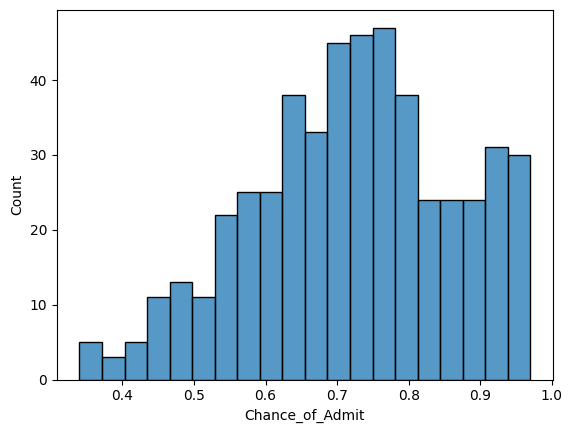

In [103]:
#Distribution of Target feature
sns.histplot(df["Chance_of_Admit"], bins=20)
plt.show()

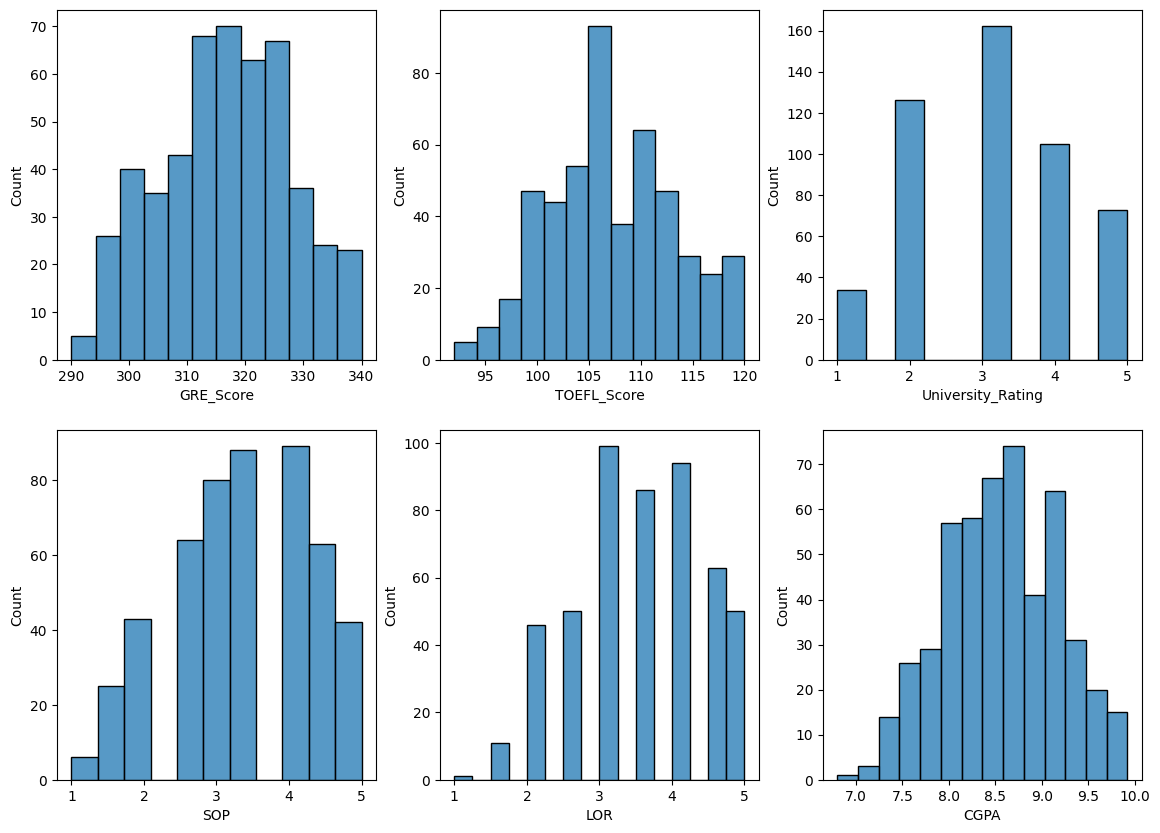

In [104]:
#Univariate analysis of features using histplot
plt.figure(figsize=(14,10))
for i in range(1,7):
  plt.subplot(2,3,i)
  sns.histplot(df.iloc[:,i-1])
plt.show()

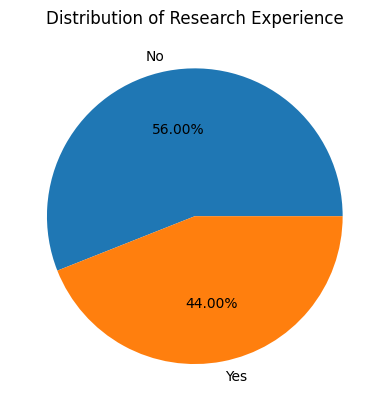

In [105]:
plt.pie(df["Research"].value_counts(), labels=["No","Yes"], autopct="%.2f%%")
plt.title("Distribution of Research Experience")
plt.show()

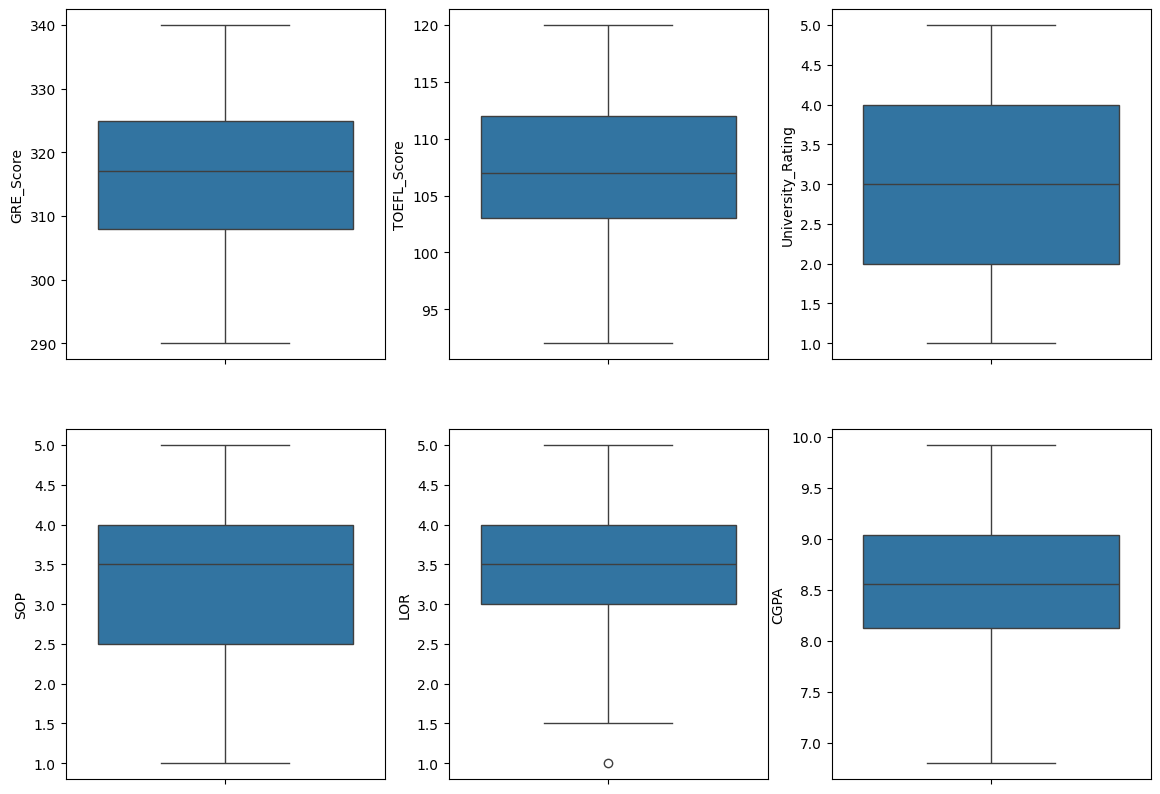

In [106]:
#Univariate analysis of features using boxplot
plt.figure(figsize=(14,10))
for i in range(1,7):
  plt.subplot(2,3,i)
  sns.boxplot(df.iloc[:,i-1])
plt.show()

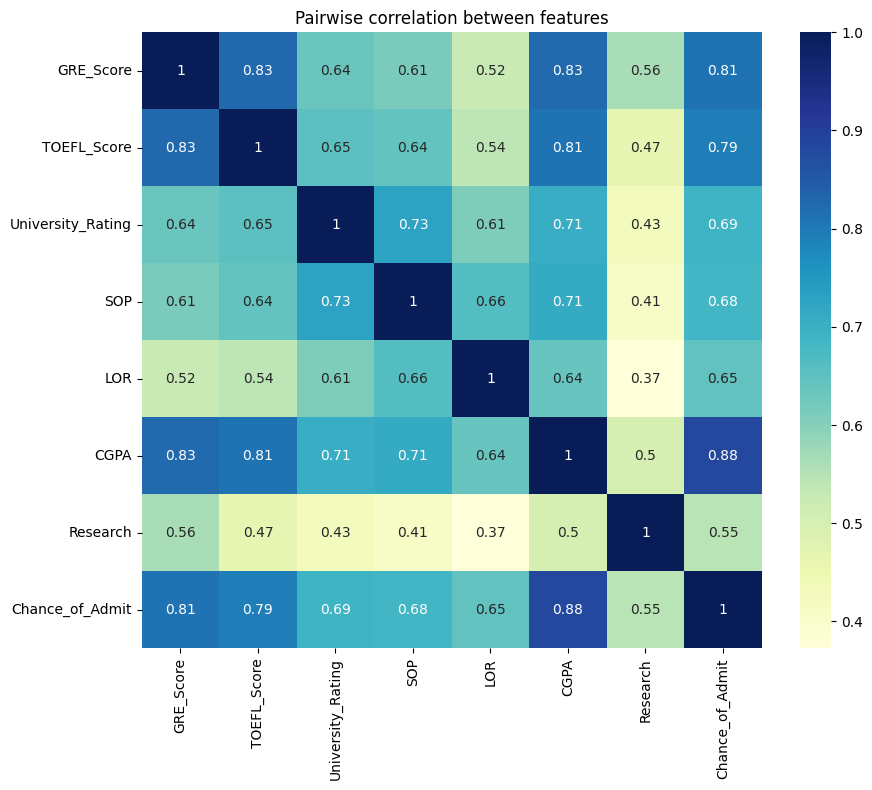

In [107]:
#Checking pairwise correlation between features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title("Pairwise correlation between features")
plt.show()

-CGPA has the strongest correlation (0.88) with Chance of Admit, followed by GRE Score (0.81) and TOEFL Score (0.79), indicating these are key predictors for admissions.

-GRE and CGPA are highly correlated (0.83), suggesting that students with higher CGPA also tend to have higher GRE scores.

-University Rating, SOP, and LOR show moderate correlations (~0.65-0.69) with Chance of Admit, meaning they still play a role but are less impactful than GRE, TOEFL, and CGPA.

-Research Experience has the weakest correlation (0.55) with Chance of Admit, indicating that while research experience matters, it is not as strong a predictor compared to academic scores.

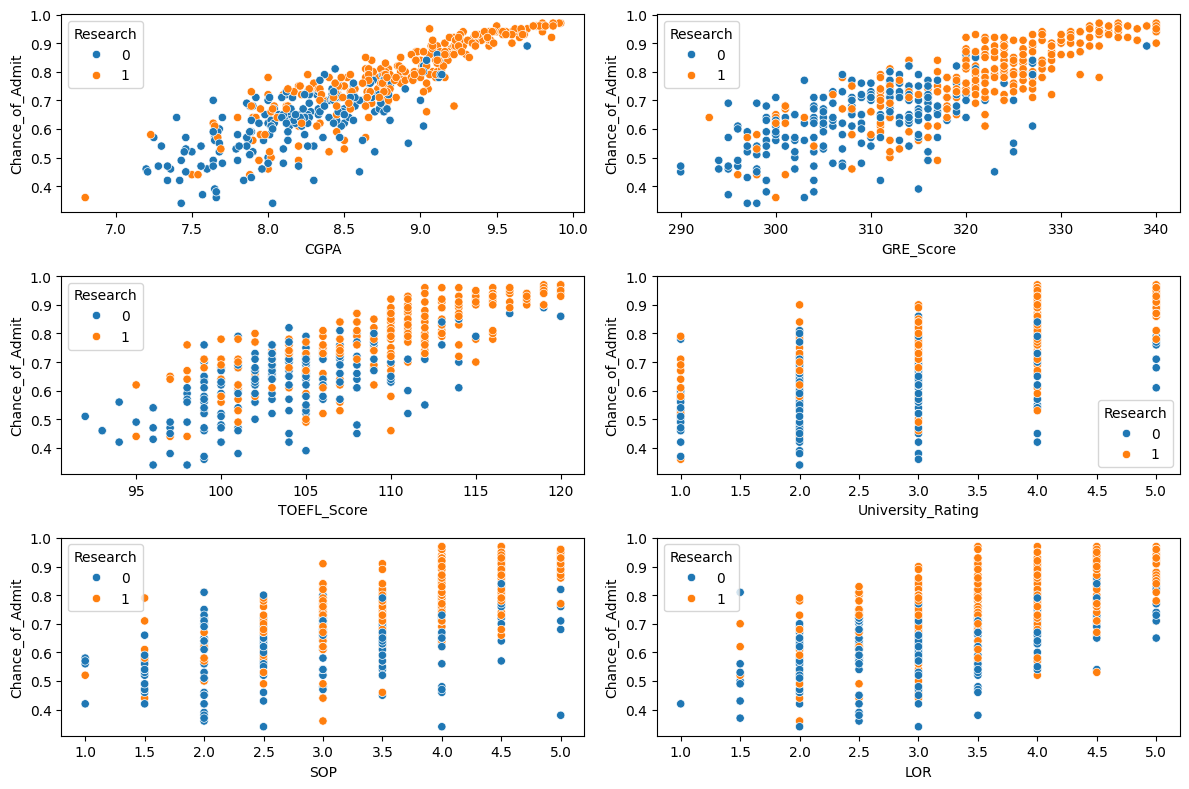

In [108]:
#Visualizing the impact of research experience on admission chances across multiple factors
plt.figure(figsize=(12,8))
cols = ["CGPA", "GRE_Score", "TOEFL_Score", "University_Rating", "SOP", "LOR"]
for i in range(6):
  plt.subplot(3,2,i+1)
  sns.scatterplot(x=cols[i], y="Chance_of_Admit", data=df, hue="Research")
plt.tight_layout()
plt.show()

-CGPA and GRE are the strongest predictors of admission, showing a clear positive correlation—higher scores significantly increase chances. TOEFL also plays an important role, but its impact is slightly weaker compared to CGPA and GRE.

-Research experience gives a strong competitive edge, especially for students in the mid-range CGPA (8.0-9.0) and GRE (300-320), where it noticeably improves admission probabilities.

-SOP, LOR, and University Rating contribute to admissions in a stepwise manner, meaning higher ratings improve chances but are secondary to academic scores. TOEFL has a more scattered influence, indicating that a strong score alone isn’t enough without a solid CGPA and GRE.

# Linear Regression using sklearn library

In [109]:
#Creating X and y from the dataset
X = df.drop(columns=["Chance_of_Admit"])
y = df["Chance_of_Admit"]

In [110]:
#Splitting dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [111]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
df_train_scaled.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [112]:
#Linear Regression using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [113]:
#R2-score for train data
r2_score_lr = model.score(X_train_scaled,y_train)
r2_score_lr

0.8210671369321554

-The simple linear regression model achieved an R2 score of 0.821 on the training data, meaning it explains 82.1% of the variance in admission chances.

-Some variance (17.9%) remains unexplained, which could be due to missing factors like extracurriculars, work experience, or university-specific criteria.

-We will also try Polynomial, Ridge, and Lasso Regression to see if we can further improve the model’s accuracy and predictive power.


In [114]:
#Adjusted R2-score
def adjusted_r2(r2, n, d):
    return 1 - ((1-r2)*((n-1))/(n-d-1))

In [115]:
#Adjusted R2-score
n = X_train.shape[0]
d = X_train.shape[1]
adjusted_r2_score_lr = adjusted_r2(r2_score_lr, n, d)
adjusted_r2_score_lr

0.8178719072345153

The Adjusted R2 score of 0.818, slightly lower than the R2 score of 0.821, confirms that the model is well-fitted and not overly reliant on unnecessary features. Unlike R2, Adjusted R2 penalizes adding irrelevant features, ensuring that only meaningful predictors contribute to the model’s performance.

In [116]:
#Model coefficients (weights)
model.coef_

array([0.02667052, 0.01822633, 0.00293995, 0.001788  , 0.0158655 ,
       0.06758106, 0.01194049])

In [117]:
#Displaying model coefficients with column names
weights = pd.DataFrame(list(zip(df.columns,model.coef_)),columns=["Feature","Weight"])
weights

,Feature,Weight
0,GRE_Score,0.026671
1,TOEFL_Score,0.018226
2,University_Rating,0.002940
3,SOP,0.001788
4,LOR,0.015866
5,CGPA,0.067581
6,Research,0.011940


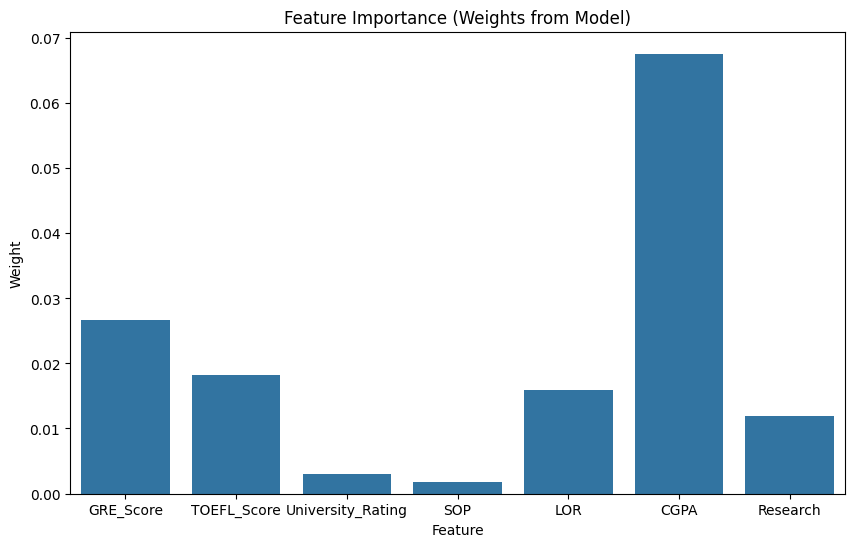

In [118]:
#Visualizing the above coefficients using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Weight", data=weights)
plt.title("Feature Importance (Weights from Model)")
plt.show()

-CGPA (0.0676) has the highest positive impact, meaning a 1-unit increase in CGPA leads to an approx. 6.76% higher admission probability, keeping other factors constant.

-GRE Score (0.0267) and TOEFL Score (0.0182) also positively influence admissions, but their effect is smaller compared to CGPA.

-Research experience (0.0119) slightly increases chances, suggesting that students with research are preferred.

-SOP (0.0018) and LOR (0.0159) have minimal impact, indicating that other factors dominate in admission decisions.

In [119]:
#Model intercept
model.intercept_

0.7241749999999999

In [120]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
y_pred_train = model.predict(X_train_scaled)
mae_train_lr = mean_absolute_error(y_train, y_pred_train)
mae_train_lr

0.042533340611643135

In [121]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
y_pred_train = model.predict(X_train_scaled)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train_lr

0.05938480848210052

The Root Mean Squared Error (RMSE) of 0.0594 and Mean Absolute Error (MAE) of 0.0425 indicate that the model's predictions are quite close to actual values, with an average absolute deviation of around 4.25% in admission probability. Since MSE is very low, large prediction errors are minimal, suggesting a well-fitted model.

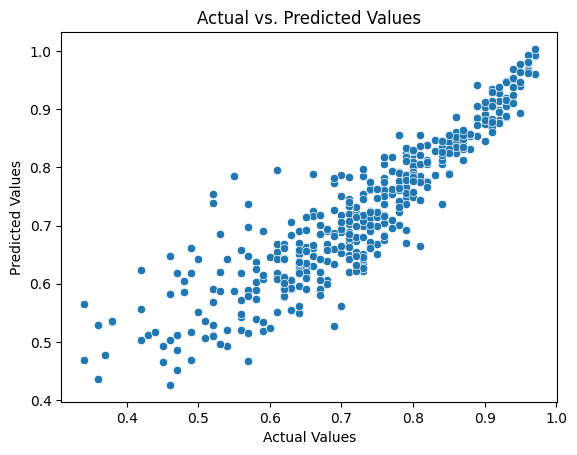

In [177]:
#Visualizing model fit by plotting actual vs predicted values
sns.scatterplot(x=y_train, y=y_pred_train)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Linear Regression using statsmodels library

In [122]:
#Linear Regression using statsmodels
import statsmodels.api as sm
X_sm = sm.add_constant(X_train_scaled)
model_ols = sm.OLS(y_train, X_sm).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          3.41e-142
Time:                        16:40:26   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

The OLS regression model achieved an R² of 0.821, meaning it explains 82.1% of the variance in admission chances, with an Adjusted R² of 0.818, confirming a well-fitted model. The p-values indicate that GRE Score, TOEFL Score, LOR, CGPA, and Research Experience significantly impact admissions (p < 0.05), while SOP and University Rating are statistically insignificant (p > 0.05). The Durbin-Watson score of 2.05 suggests no strong autocorrelation in residuals, ensuring reliable predictions.

Compared to the sklearn Linear Regression model, the results are identical for R2 score, adjusted R2 score, coefficients and the intercept. However, Statsmodels provides additional statistical insights, such as p-values and confidence intervals, which help in understanding the significance of each feature.

In [123]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
y_pred_train = model_ols.predict(X_sm)
mae_train_OLS = mean_absolute_error(y_train, y_pred_train)
mae_train_OLS

0.042533340611643065

In [124]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
y_pred_train = model_ols.predict(X_sm)
rmse_train_OLS = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train_OLS

0.05938480848210052

The RMSE and MAE values for the OLS model using Statsmodels are identical to those obtained from sklearn.

# Testing the assumptions for Linear Regression

## Linearity of Variables

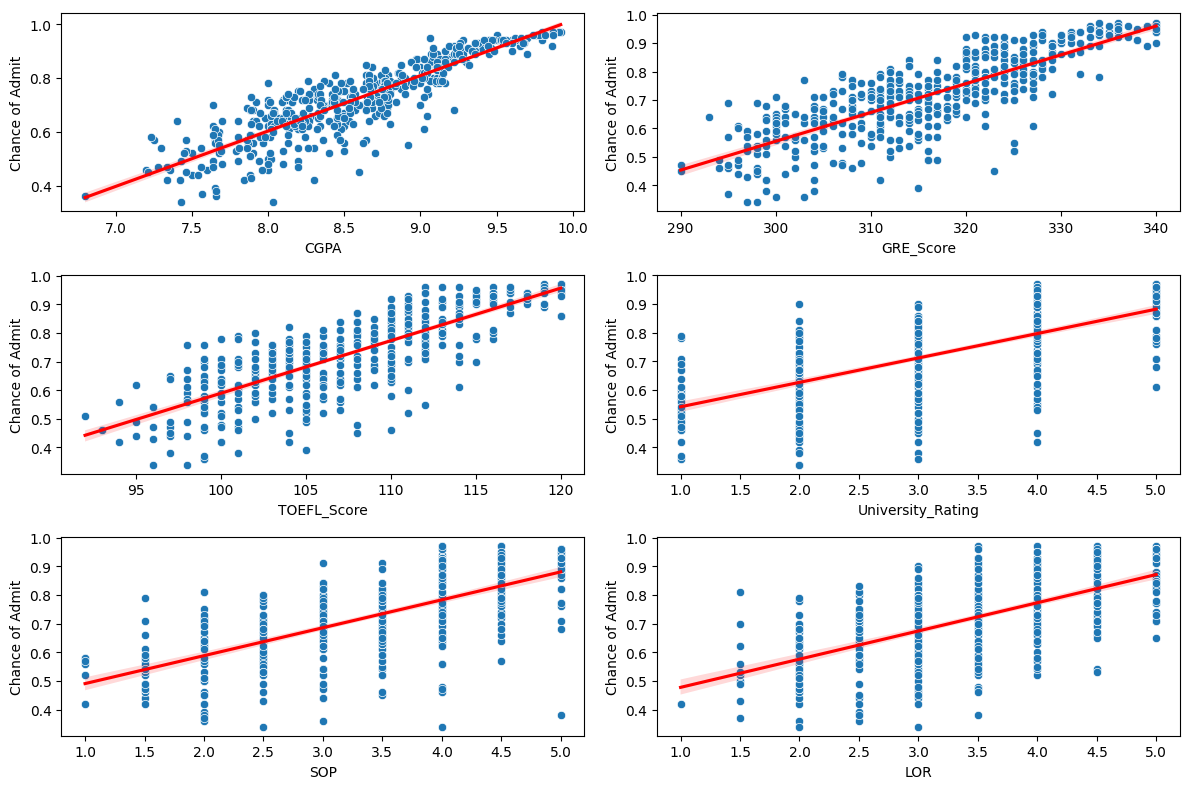

In [125]:
#Checking Linearity: Scatter Plots with Trend Lines for Each Feature
plt.figure(figsize=(12,8))
cols = ["CGPA", "GRE_Score", "TOEFL_Score", "University_Rating", "SOP", "LOR"]
for i in range(len(cols)):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[cols[i]], y=df["Chance_of_Admit"])
    sns.regplot(x=df[cols[i]], y=df["Chance_of_Admit"], scatter=False, color="red")
    plt.xlabel(cols[i])
    plt.ylabel("Chance of Admit")
plt.tight_layout()
plt.show()

The plots confirm that CGPA, GRE Score, and TOEFL Score satisfy the linearity assumption, while University Rating, SOP, and LOR show weaker linear relationships. Linear regression can still model them, but polynomial transformations or Ridge/Lasso may improve accuracy.

## Checking for multi-collinearity of features (VIF)

In [126]:
#Checking for Multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_train_scaled.values, i) for i in range(df_train_scaled.shape[1])]
vif_data.sort_values(by=["VIF"], ascending=False, inplace=True)
vif_data = vif_data.reset_index(drop=True)
round(vif_data,3)

,feature,VIF
0,CGPA,4.655
1,GRE_Score,4.490
2,TOEFL_Score,3.664
3,SOP,2.786
4,University_Rating,2.572
5,LOR,1.978
6,Research,1.518


The VIF values for all features are below 5, indicating no severe multicollinearity in the dataset. Since the highest VIF is 4.655 (CGPA), which is still within the acceptable range, the multicollinearity assumption of linear regression holds, and we don’t need to drop any features.

## Normality of Residuals

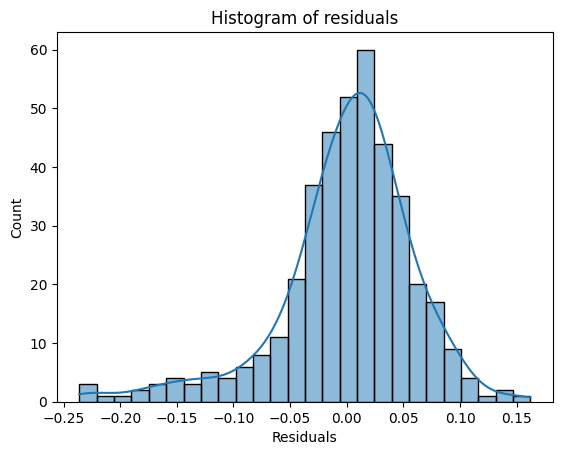

In [127]:
#Checking Normality of Residuals Using Histogram and KDE Plot
y_pred = model.predict(X_train_scaled)
error = y_train-y_pred
sns.histplot(error,kde=True)
plt.title("Histogram of residuals")
plt.xlabel("Residuals")
plt.show()

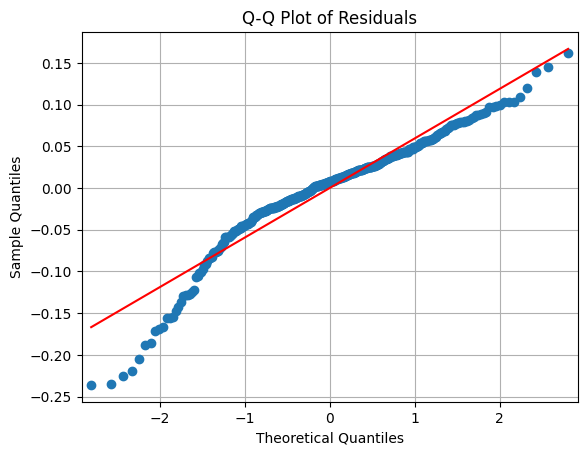

In [128]:
#Q-Q Plot for Normality Check
from statsmodels.graphics.gofplots import qqplot
qqplot(error, line="s")
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

The histogram of residuals shows a nearly bell-shaped curve, suggesting approximate normality, while the Q-Q plot confirms that most points follow the diagonal line, with slight deviations at the tails. This indicates minor skewness but no major violations of the normality assumption. Since linear regression is robust to slight deviations, the assumption holds well, though transformations could further refine it if needed.

## Mean of Residuals

In [129]:
#Calculating Mean of Residuals
y_pred = model.predict(X_train_scaled)
error = y_train-y_pred
mean_residual = error.mean()
mean_residual

1.4419021532319221e-16

The mean of residuals is extremely small, confirming that the model's predictions are unbiased on average. This means the linearity assumption holds, and there is no systematic over- or under-prediction in the model.

## Heteroskedasticity

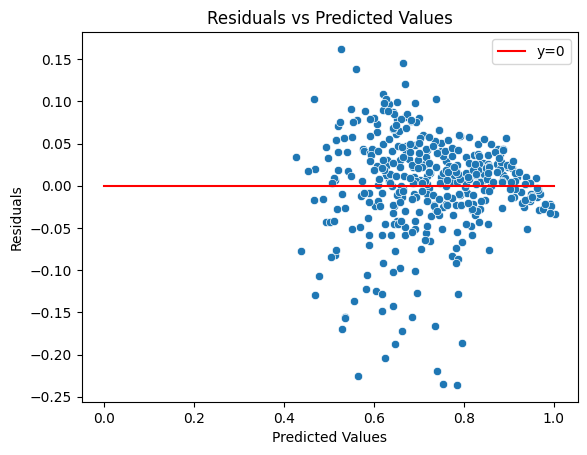

In [130]:
#Plotting Residuals vs Predicted values to check for heteroskedasticity
sns.scatterplot(x=y_pred, y=error)
x = np.linspace(0,1,100)
y = np.zeros(100)
plt.plot(x,y, color="red", label="y=0")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

In [131]:
#Performing the Goldfeld-Quandt test to check for Heteroscedasticity
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(model_ols.resid, model_ols.model.exog, split=0.5)
gq_statistic, p_value, _ = gq_test
print(f"Goldfeld-Quandt Test Statistic: {gq_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Heteroscedasticity detected (Reject Null Hypothesis)")
else:
    print("No significant heteroscedasticity detected (Fail to Reject Null Hypothesis)")

Goldfeld-Quandt Test Statistic: 0.9507
P-value: 0.6368
No significant heteroscedasticity detected (Fail to Reject Null Hypothesis)


The Residuals vs Predicted Values plot shows that the residuals are randomly scattered around zero without a clear pattern or increasing spread, indicating no signs of heteroscedasticity. The Goldfeld-Quandt test further confirms this, with a p-value of 0.6368, meaning we fail to reject the null hypothesis. Since the residual variance remains consistent across different predicted values (not expanding or shrinking), the homoscedasticity assumption holds, validating the reliability of our linear regression model

# Polynomial Regression

In [182]:
#Generating Polynomial Features and Scaling the Data (Degree=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_poly_test_scaled = scaler.transform(poly.transform(X_test))

In [183]:
#Fitting Polynomial Regression Model
model_poly = LinearRegression()
model_poly.fit(X_poly_train_scaled, y_train)

LinearRegression()

In [184]:
#R2-score for train data
r2_score_poly = model_poly.score(X_poly_train_scaled, y_train)
r2_score_poly

0.8357962945524069

The Polynomial Regression model (degree = 2) achieved a training R2 score of 0.836, slightly improving over the Linear Regression model (0.821). This suggests that a quadratic relationship exists in the data, but the improvement over simple linear regression is marginal. However, its true effectiveness will be clearer when we compare all models on test data together later.

In [135]:
#Adjusted R2-score
n = X_train.shape[0]
d = X_train.shape[1]
adjusted_r2_score_poly = adjusted_r2(r2_score_poly, n, d)
adjusted_r2_score_poly

0.832864085526557

The Adjusted R2 score of 0.833 (slightly lower than the R2 score of 0.836) confirms that the added polynomial features contribute meaningfully without excessive overfitting.

In [136]:
#Model coefficients (weights)
model_poly.coef_

array([ 3.44819756e-14,  1.85743552e-01,  1.78844076e-01, -1.01985967e-01,
       -2.85794076e-01,  6.27264436e-02,  4.21274184e-01, -6.52479282e-02,
        1.22928594e-01, -1.40661247e-01,  1.17837080e-01,  1.54919153e-01,
        2.70952455e-01, -8.42662173e-01, -5.12247494e-02, -6.32122621e-02,
        3.85532937e-03,  2.37513535e-01, -2.01113960e-01, -2.80913943e-02,
        8.39307954e-02, -1.05897290e-03,  1.15500890e-01, -1.79194599e-02,
       -7.58636841e-02,  3.56116440e-03, -1.05753355e-01,  2.55854249e-02,
       -2.46075639e-02, -1.13592258e-02,  2.41231040e-02, -1.77626810e-01,
       -5.23338459e-03,  2.95050389e-01,  1.27217472e-01, -6.52479282e-02])

The Polynomial Regression model (degree = 2) has 36 coefficients, including interaction terms, allowing it to capture non-linear relationships in the data.

In [137]:
#Model intercept
model_poly.intercept_

0.724175000000001

In [138]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
y_pred_train_poly = model_poly.predict(X_poly_train_scaled)
mae_train_poly = mean_absolute_error(y_train, y_pred_train_poly)
mae_train_poly

0.04004455671536485

In [139]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
y_pred_train_poly = model_poly.predict(X_poly_train_scaled)
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
rmse_train_poly

0.056888146141110235

The MAE (0.0400) and RMSE (0.0569) for Polynomial Regression are very slightly lower than those of Linear Regression, indicating a small improvement in prediction accuracy. However, since the reduction is minor, the additional complexity of polynomial features may not be significantly beneficial over simple linear regression.

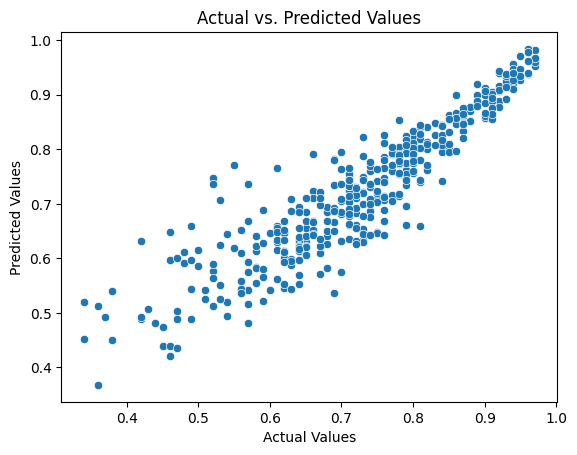

In [178]:
#Visualizing model fit by plotting actual vs predicted values
sns.scatterplot(x=y_train, y=y_pred_train_poly)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Regularization Models

## Ridge

In [140]:
#Training Ridge Regression on Polynomial Features (alpha=1)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_poly_train_scaled, y_train)

Ridge(alpha=1)

In [141]:
#R2-score for train data
r2_score_ridge = ridge.score(X_poly_train_scaled, y_train)
r2_score_ridge

0.8294299169696493

In [142]:
#Adjusted R2-score
n = X_train.shape[0]
d = X_train.shape[1]
adjusted_r2_score_ridge = adjusted_r2(r2_score_ridge, n, d)
adjusted_r2_score_ridge

0.8263840226298216

In [143]:
#Model coefficients (weights)
ridge.coef_

array([ 0.        ,  0.02875458,  0.0328957 ,  0.00173637,  0.00131996,
        0.04496311,  0.06944195, -0.00024004, -0.00389726, -0.0033463 ,
       -0.00879788,  0.00234316,  0.00975756,  0.00530892, -0.00657572,
       -0.00739883, -0.01041198,  0.01219618, -0.0224382 , -0.00465222,
       -0.00111173,  0.00048263,  0.08154004, -0.01791613, -0.02664364,
        0.01485103, -0.05437359,  0.00494972, -0.00036229,  0.01373636,
        0.00671483, -0.02062011, -0.00987706,  0.00363464,  0.00616779,
       -0.00024004])

In [144]:
#Model intercept
ridge.intercept_

0.7241750000000009

In [145]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
y_pred_train_ridge = ridge.predict(X_poly_train_scaled)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mae_train_ridge

0.041055898999974055

In [146]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
y_pred_train_ridge = ridge.predict(X_poly_train_scaled)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
rmse_train_ridge

0.05798047048122267

The Ridge Regression model (α = 1) didn’t provide any significant advantage over Polynomial Regression. MAE (0.0411) and RMSE (0.0580) are slightly worse, and the R2 score dropped from 0.836 to 0.829. This suggests that regularization wasn’t needed here, as Polynomial Regression wasn’t overfitting much to begin with. In this case, using Ridge added complexity without real benefit—sticking with plain Polynomial Regression would have been better.

## Lasso

In [147]:
#Training Lasso Regression on Polynomial Features (alpha=1)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_poly_train_scaled, y_train)

Lasso(alpha=0.01)

In [148]:
#R2-score for train data
r2_score_lasso = lasso.score(X_poly_train_scaled, y_train)
r2_score_lasso

0.8129782928003578

In [149]:
#Adjusted R2-score
n = X_train.shape[0]
d = X_train.shape[1]
adjusted_r2_score_lasso = adjusted_r2(r2_score_lasso, n, d)
adjusted_r2_score_lasso

0.809638619457507

In [150]:
#Model coefficients (weights)
lasso.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.07394374, 0.        ,
       0.        , 0.        , 0.        , 0.01254987, 0.02591995,
       0.        , 0.        , 0.00043535, 0.        , 0.        ,
       0.00993108, 0.        , 0.        , 0.        , 0.00062707,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

Lasso Regression eliminated most coefficients (set them to zero), keeping only a few features, which explains the drop in R² (0.813)—confirming that Lasso is too aggressive here and not beneficial for this dataset.

In [151]:
#Model intercept
lasso.intercept_

0.7241750000000006

In [152]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
y_pred_train_lasso = lasso.predict(X_poly_train_scaled)
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
mae_train_lasso

0.04351398467767011

In [153]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
y_pred_train_lasso = lasso.predict(X_poly_train_scaled)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
rmse_train_lasso

0.06071224791096015

The MAE (0.0435) and RMSE (0.0607) for Lasso Regression are higher than both Polynomial (MAE: 0.0400, RMSE: 0.0569) and Ridge (MAE: 0.0411, RMSE: 0.0580), confirming that Lasso’s aggressive feature elimination hurt performance. The increased error and lower R2 score (0.813) show that Lasso is not suitable for this dataset, as it removed too many important features. Polynomial Regression remains the best model so far.

# Evaluating performance on Test Data

In [174]:
#Creating a DataFrame for the training data performance summary
train_results = {
    "Model": ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression"],
    "R2 Score": [r2_score_lr, r2_score_poly, r2_score_ridge, r2_score_lasso],
    "Adjusted R2": [adjusted_r2_score_lr, adjusted_r2_score_poly, adjusted_r2_score_ridge, adjusted_r2_score_lasso],
    "MAE": [mae_train_lr, mae_train_poly, mae_train_ridge, mae_train_lasso],
    "RMSE": [rmse_train_lr, rmse_train_poly, rmse_train_ridge, rmse_train_lasso],
}
df_train_results = round(pd.DataFrame(train_results),4)
df_train_results


,Model,R2 Score,Adjusted R2,MAE,RMSE
0,Linear Regression,0.8211,0.8179,0.0425,0.0594
1,Polynomial Regression,0.8358,0.8329,0.0400,0.0569
2,Ridge Regression,0.8294,0.8264,0.0411,0.0580
3,Lasso Regression,0.8130,0.8096,0.0435,0.0607


Next, we will calculate all the above values for the test data and  then summarise them in a table.

In [164]:
#Linear Regression Test Data
y_pred_test = model.predict(X_test_scaled)
r2_score_test = model.score(X_test_scaled, y_test)
adjusted_r2_score_test = adjusted_r2(r2_score_test, X_test.shape[0], X_test.shape[1])
mae_test_lr = mean_absolute_error(y_test, y_pred_test)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [170]:
#Polynomial Regression Test Data
y_pred_test_poly = model_poly.predict(X_poly_test_scaled)
r2_score_test_poly = model_poly.score(X_poly_test_scaled, y_test)
adjusted_r2_score_test_poly = adjusted_r2(r2_score_test_poly, X_test.shape[0], X_test.shape[1])
mae_test_poly = mean_absolute_error(y_test, y_pred_test_poly)
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))

In [172]:
#Ridge Regression Test Data
y_pred_test_ridge = ridge.predict(X_poly_test_scaled)
r2_score_test_ridge = ridge.score(X_poly_test_scaled, y_test)
adjusted_r2_score_test_ridge = adjusted_r2(r2_score_test_ridge, X_test.shape[0], X_test.shape[1])
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))

In [173]:
#Lasso Regression Test Data
y_pred_test_lasso = lasso.predict(X_poly_test_scaled)
r2_score_test_lasso = lasso.score(X_poly_test_scaled, y_test)
adjusted_r2_score_test_lasso = adjusted_r2(r2_score_test_lasso, X_test.shape[0], X_test.shape[1])
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))

In [176]:
#Creating a DataFrame for the test data performance summary
test_results = {
    "Model": ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression"],
    "R2 Score": [r2_score_test, r2_score_test_poly, r2_score_test_ridge, r2_score_test_lasso],
    "Adjusted R2": [adjusted_r2_score_test, adjusted_r2_score_test_poly, adjusted_r2_score_test_ridge, adjusted_r2_score_test_lasso],
    "MAE": [mae_test_lr, mae_test_poly, mae_test_ridge, mae_test_lasso],
    "RMSE": [rmse_test_lr, rmse_test_poly, rmse_test_ridge, rmse_test_lasso],
}
df_test_results = round(pd.DataFrame(test_results),4)
df_test_results


,Model,R2 Score,Adjusted R2,MAE,RMSE
0,Linear Regression,0.8188,0.8051,0.0427,0.0609
1,Polynomial Regression,0.8265,0.8133,0.0406,0.0596
2,Ridge Regression,0.8298,0.8168,0.0412,0.0590
3,Lasso Regression,0.8185,0.8047,0.0424,0.0609


-Polynomial Regression (R² = 0.8265) is the best balance between accuracy and simplicity. It improves the fit slightly over Linear Regression without adding unnecessary complexity. Given the small improvement, it may not be worth using a higher-degree polynomial.

-Ridge Regression (R² = 0.8298) barely improves performance (only ~0.003 gain over Polynomial Regression). But it adds regularization complexity, making it unnecessary for this dataset. If overfitting was an issue, Ridge would be useful—but here, it’s not significantly helping.

-Lasso Regression didn’t add value since its R² (0.8185) is almost identical to Linear Regression. It removed some feature influence, which isn’t beneficial in this case.

-Best Practical Model: Polynomial Regression (Degree = 2). It captures slight non-linearity without unnecessary complexity. Ridge isn’t worth it for such a tiny R² boost. If we really want a significant improvement, we should consider XGBoost or a tree-based model instead.

# Insights & Recommendations

**Key Predictor Variables & Their Significance**

-CGPA, GRE, and TOEFL Scores are the strongest predictors of admission chances, with CGPA having the highest impact.

-Research Experience provides a competitive edge, especially for mid-range applicants, but is not as significant as CGPA.

-SOP, LOR, and University Rating influence admission but play a secondary role compared to academic scores.

**Additional Data Sources for Model Improvement**

-Extracurricular Activities & Work Experience: Including these can better reflect holistic applicant profiles.

-University-Specific Cutoffs & Acceptance Trends: Different universities have different selection criteria, which can refine predictions.

-Scholarship & Funding Information: Can help students make data-driven financial decisions.

**Model Implementation & Business Benefits**

-Deploy the Model in Jamboree’s Admission Predictor Tool to provide real-time admission probability estimates.

-AI-Based Admission Consulting: Personalized recommendations based on applicant profiles.

-Enhance SOP & LOR Guidance Services to help students improve their non-academic aspects.

-Develop a Research & Mentorship Program to support students in building stronger applications.

These enhancements will improve prediction accuracy, enhance student success rates, and strengthen Jamboree’s reputation as a leading education consultancy.